<a href="https://colab.research.google.com/github/Andreaierardi/Machine-Learning-Project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download --force -d moltean/fruits

 99% 755M/760M [00:41<00:00, 41.4MB/s]
100% 760M/760M [00:41<00:00, 19.0MB/s]


In [5]:
!unzip fruits.zip


Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

# Image classification with Neural Networks
## Machine Learning Project

Group: Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset
### 1.1 Libraries


In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 


from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils

Using TensorFlow backend.


## 1.2 Data Loading

In [7]:
DATADIR = "fruits-360/Training"
DATADIR_test = "fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [8]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

100%|██████████| 164/164 [00:00<00:00, 296.31it/s]

100%|██████████| 131/131 [00:28<00:00,  4.65it/s]


In [11]:
x_train, y_train= train

In [12]:
x_test, y_test = test

### Train and test shape


In [13]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


## 1.2 Pre-processing

### Pre-process the labels and the images


In [14]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [15]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


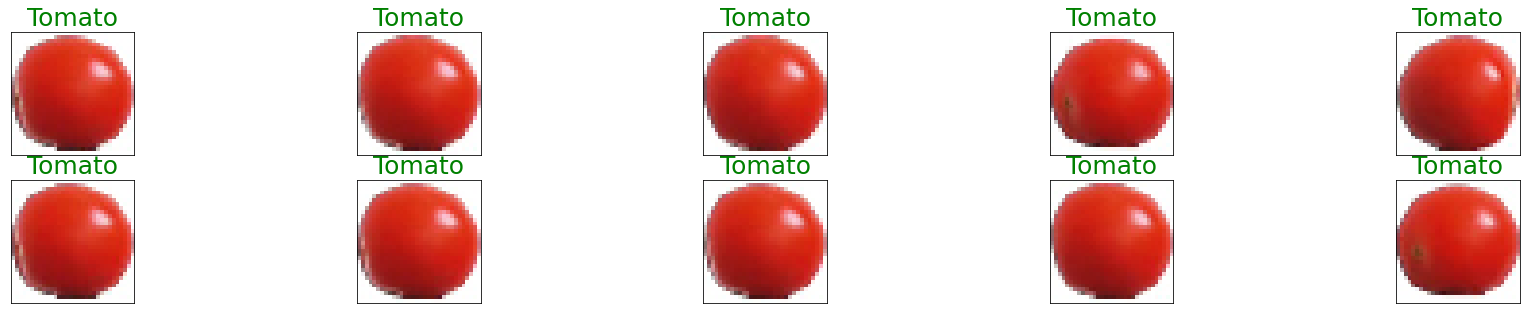

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [17]:
from sklearn.utils import shuffle
import numpy as np
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


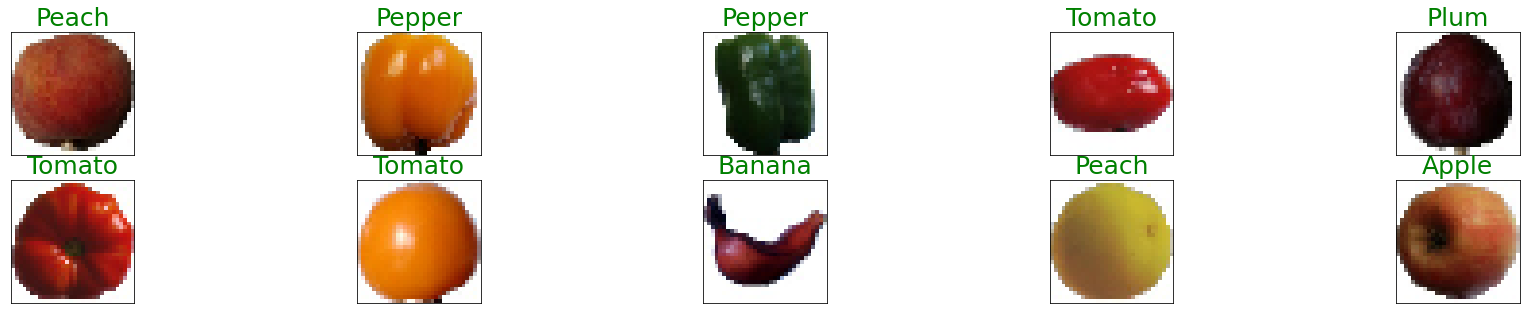

In [19]:


import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [20]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [21]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_vaild = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Vaildation X :  (8724, 32, 32, 3)
Vaildation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


# 1.3  Convolutional Neural Newtworks

## One VGG block CNN


In [22]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "1_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
______________________________________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [24]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 10s - loss: 0.2131 - accuracy: 0.9305 - val_loss: 0.0822 - val_accuracy: 0.9729
Epoch 2/10
1019/1019 - 10s - loss: 0.0163 - accuracy: 0.9962 - val_loss: 0.0958 - val_accuracy: 0.9721
Epoch 3/10
1019/1019 - 10s - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.1519 - val_accuracy: 0.9669
Epoch 4/10
1019/1019 - 10s - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.2826 - val_accuracy: 0.9622
Epoch 5/10
1019/1019 - 10s - loss: 0.0085 - accuracy: 0.9988 - val_loss: 0.1328 - val_accuracy: 0.9757
Epoch 6/10
1019/1019 - 10s - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.1452 - val_accuracy: 0.9782
Epoch 7/10
1019/1019 - 10s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.1444 - val_accuracy: 0.9746
Epoch 8/10
1019/1019 - 10s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.2462 - val_accuracy: 0.9700
Epoch 9/10
1019/1019 - 10s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.2171 - val_accuracy: 0.9736
Epoch 10/10
1019/1019 - 10s - loss: 0.0037 - accuracy: 0.9996 - val_loss:

In [25]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])




 Test accuracy: 0.9729605913162231


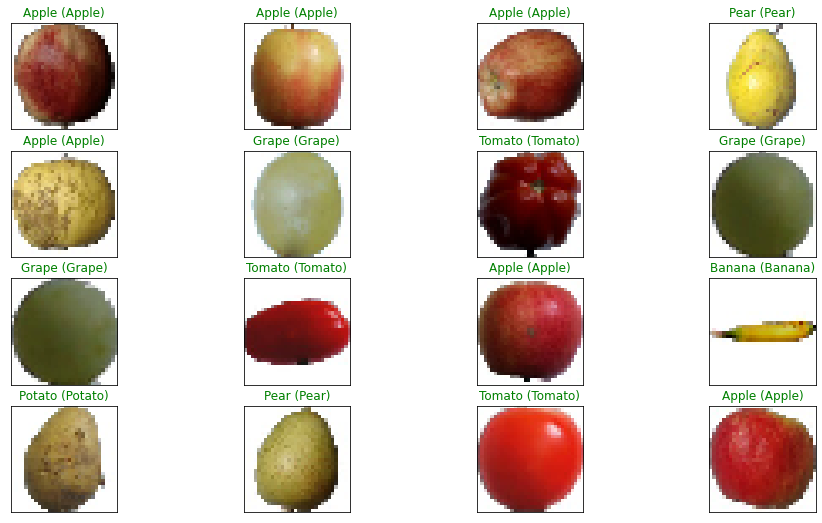

In [26]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



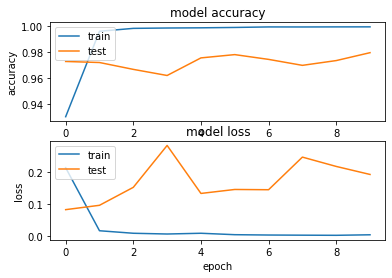

In [27]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


## Two VGG blocks



In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "2_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [34]:
history2 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 13s - loss: 0.2201 - accuracy: 0.9250 - val_loss: 0.0462 - val_accuracy: 0.9798
Epoch 2/10
1019/1019 - 13s - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0511 - val_accuracy: 0.9813
Epoch 3/10
1019/1019 - 13s - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 4/10
1019/1019 - 13s - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.1415 - val_accuracy: 0.9592
Epoch 5/10
1019/1019 - 13s - loss: 7.9755e-04 - accuracy: 0.9998 - val_loss: 0.0142 - val_accuracy: 0.9950
Epoch 6/10
1019/1019 - 13s - loss: 8.4255e-06 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9952
Epoch 7/10
1019/1019 - 13s - loss: 3.7330e-06 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 0.9947
Epoch 8/10
1019/1019 - 13s - loss: 2.1203e-06 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9951
Epoch 9/10
1019/1019 - 13s - loss: 1.1882e-06 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9950
Epoch 10/10
1019/1019 - 13s - loss: 7.2978e-07 - accu

In [35]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.994958758354187


## Three VGG blocks

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 128)        

In [37]:
history3 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 18s - loss: 0.3101 - accuracy: 0.8937 - val_loss: 0.0835 - val_accuracy: 0.9755
Epoch 2/10
1019/1019 - 18s - loss: 0.0325 - accuracy: 0.9908 - val_loss: 0.0985 - val_accuracy: 0.9655
Epoch 3/10
1019/1019 - 18s - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0163 - val_accuracy: 0.9940
Epoch 4/10
1019/1019 - 18s - loss: 9.4067e-05 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 5/10
1019/1019 - 18s - loss: 9.1199e-06 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 6/10
1019/1019 - 18s - loss: 4.1407e-06 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 7/10
1019/1019 - 17s - loss: 2.1324e-06 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 8/10
1019/1019 - 17s - loss: 1.1379e-06 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 9/10
1019/1019 - 17s - loss: 6.3394e-07 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 0.9990
Epoch 10/10
1019/1019 - 18s - loss: 3.5544e-07 - 

In [38]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.995875358581543


## Three VGG blocks with Dropout


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)         

In [40]:
history4 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 19s - loss: 0.5283 - accuracy: 0.8113 - val_loss: 0.3729 - val_accuracy: 0.8960
Epoch 2/10
1019/1019 - 18s - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.2389 - val_accuracy: 0.9359
Epoch 3/10
1019/1019 - 19s - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0778 - val_accuracy: 0.9750
Epoch 4/10
1019/1019 - 18s - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.1364 - val_accuracy: 0.9486
Epoch 5/10
1019/1019 - 19s - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.0685 - val_accuracy: 0.9718
Epoch 6/10
1019/1019 - 18s - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0706 - val_accuracy: 0.9775
Epoch 7/10
1019/1019 - 19s - loss: 0.0281 - accuracy: 0.9929 - val_loss: 0.0895 - val_accuracy: 0.9680
Epoch 8/10
1019/1019 - 18s - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.1442 - val_accuracy: 0.9634
Epoch 9/10
1019/1019 - 19s - loss: 0.0150 - accuracy: 0.9963 - val_loss: 0.0588 - val_accuracy: 0.9862
Epoch 10/10
1019/1019 - 18s - loss: 0.0178 - accuracy: 0.9956 - val_loss:

In [41]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9876260161399841


## Three VGG blocks with Dropout and Batch Normalization


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout_BN"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)       

In [42]:
history5 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 19s - loss: 0.0213 - accuracy: 0.9944 - val_loss: 0.0337 - val_accuracy: 0.9911
Epoch 2/10
1019/1019 - 18s - loss: 0.0268 - accuracy: 0.9939 - val_loss: 0.2895 - val_accuracy: 0.9121
Epoch 3/10
1019/1019 - 19s - loss: 0.0100 - accuracy: 0.9973 - val_loss: 0.0334 - val_accuracy: 0.9880
Epoch 4/10
1019/1019 - 18s - loss: 0.0202 - accuracy: 0.9949 - val_loss: 0.0779 - val_accuracy: 0.9782
Epoch 5/10
1019/1019 - 19s - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0832 - val_accuracy: 0.9780
Epoch 6/10
1019/1019 - 18s - loss: 0.0170 - accuracy: 0.9962 - val_loss: 0.0633 - val_accuracy: 0.9882
Epoch 7/10
1019/1019 - 19s - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0264 - val_accuracy: 0.9916
Epoch 8/10
1019/1019 - 18s - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.2299 - val_accuracy: 0.9633
Epoch 9/10
1019/1019 - 18s - loss: 0.0220 - accuracy: 0.9957 - val_loss: 0.0189 - val_accuracy: 0.9930
Epoch 10/10
1019/1019 - 18s - loss: 0.0131 - accuracy: 0.9969 - val_loss:

In [43]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])



 Test accuracy: 0.9766269326210022


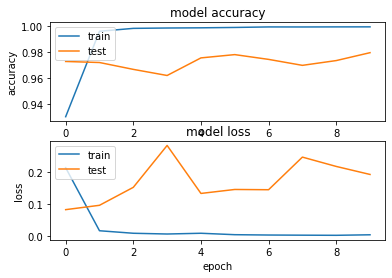

In [44]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()





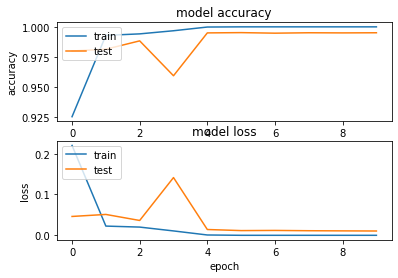

In [45]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

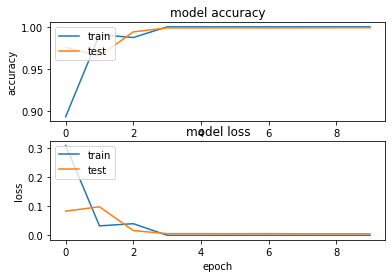

In [46]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history3.history['accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

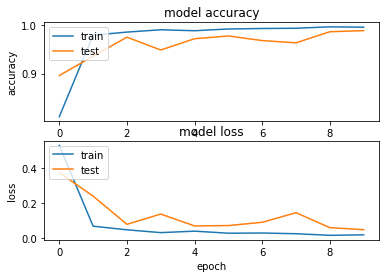

In [47]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history4.history['accuracy'])  
plt.plot(history4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

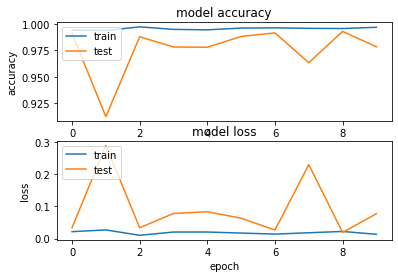

In [48]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history5.history['accuracy'])  
plt.plot(history5.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history5.history['loss'])  
plt.plot(history5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

### Parameters Tuning


In [ ]:
from datetime import datetime
from keras.callbacks import TensorBoard

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Fruits-{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, datetime.now().strftime("%d%m%Y-%H%M%S"))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, 2, input_shape=(32,32,3),padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=2))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, 2))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=2))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10,activation = 'softmax'))
    

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
            #
            #!
            #categorical_crossentropy
            #!
            #
            model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
            print('Compiled!')
            
            history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
        callbacks=[tensorboard]
        )

# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

Fruits-1-conv-32-nodes-0-dense-01072020-134508
Compiled!
Train on 32607 samples, validate on 8724 samples
Epoch 1/10


KeyboardInterrupt: ignored

#  1.4 MobileNetV2


In [ ]:
from keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')

Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [ ]:


history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, 
     #   shuffle=True
                   )



Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 333s - loss: 0.7027 - accuracy: 0.7781 - val_loss: 2.2208 - val_accuracy: 0.1956
Epoch 2/10
 - 308s - loss: 0.1812 - accuracy: 0.9463 - val_loss: 2.2877 - val_accuracy: 0.1956
Epoch 3/10
 - 311s - loss: 0.1145 - accuracy: 0.9682 - val_loss: 2.2579 - val_accuracy: 0.1956
Epoch 4/10
 - 315s - loss: 0.1019 - accuracy: 0.9727 - val_loss: 2.2019 - val_accuracy: 0.1956
Epoch 5/10
 - 304s - loss: 0.1012 - accuracy: 0.9747 - val_loss: 1.1864 - val_accuracy: 0.6405
Epoch 6/10
 - 303s - loss: 0.0945 - accuracy: 0.9771 - val_loss: 4.9842 - val_accuracy: 0.3638
Epoch 7/10
 - 304s - loss: 0.0890 - accuracy: 0.9773 - val_loss: 1.7081 - val_accuracy: 0.8386
Epoch 8/10
 - 311s - loss: 0.0610 - accuracy: 0.9858 - val_loss: 1.3364 - val_accuracy: 0.8923
Epoch 9/10
 - 303s - loss: 0.0383 - accuracy: 0.9912 - val_loss: 5.3223 - val_accuracy: 0.7011
Epoch 10/10
 - 302s - loss: 0.0707 - accuracy: 0.9829 - val_loss: 11.7161 - val_accuracy: 0.3117

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9816681742668152


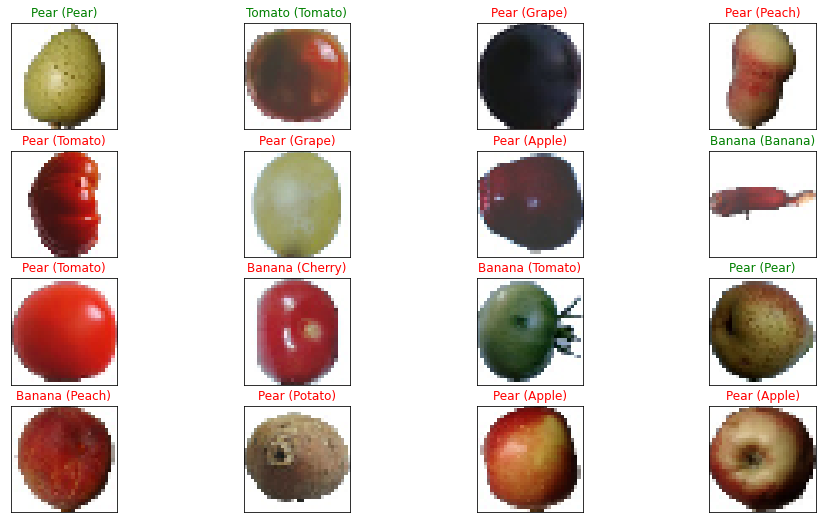

In [ ]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

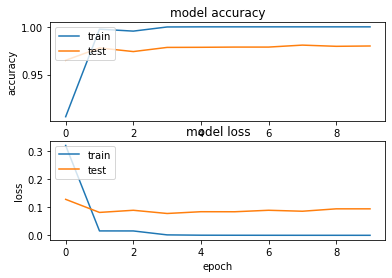

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 1.5 LeNet Neural Networks


In [ ]:
#leNet Neural Network

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:


history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_vaild),
                    verbose = 2
                    )



Epoch 1/10
1019/1019 - 44s - loss: 0.3202 - accuracy: 0.9058 - val_loss: 0.1282 - val_accuracy: 0.9649
Epoch 2/10
1019/1019 - 40s - loss: 0.0157 - accuracy: 0.9976 - val_loss: 0.0816 - val_accuracy: 0.9779
Epoch 3/10
1019/1019 - 39s - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0892 - val_accuracy: 0.9741
Epoch 4/10
1019/1019 - 39s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0778 - val_accuracy: 0.9785
Epoch 5/10
1019/1019 - 39s - loss: 4.1256e-04 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 0.9786
Epoch 6/10
1019/1019 - 44s - loss: 2.3345e-04 - accuracy: 1.0000 - val_loss: 0.0840 - val_accuracy: 0.9788
Epoch 7/10
1019/1019 - 40s - loss: 1.3843e-04 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9788
Epoch 8/10
1019/1019 - 39s - loss: 8.4063e-05 - accuracy: 1.0000 - val_loss: 0.0858 - val_accuracy: 0.9809
Epoch 9/10
1019/1019 - 39s - loss: 4.8879e-05 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9796
Epoch 10/10
1019/1019 - 38s - loss: 2.8896e-05 - accu

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9816681742668152


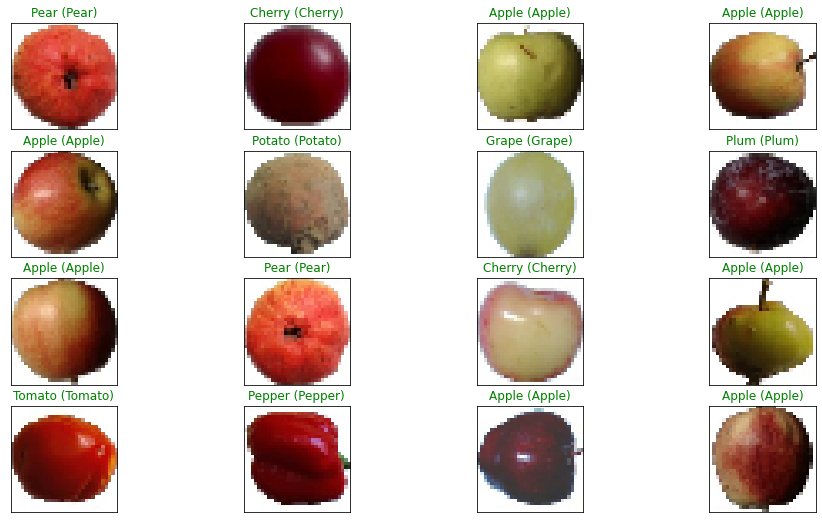

In [ ]:


y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



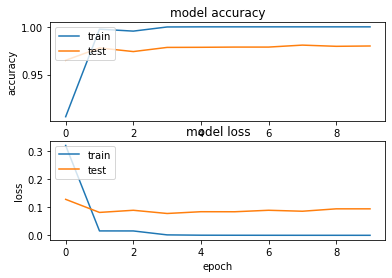

In [ ]:
#plots

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()